In [1]:
import pandas as pd

In [2]:
!head ./data/mag_papers_0.txt -n 1

{"title": "System and Method for Maskless Direct Write Lithography", "lang": "en", "year": 2015, "references": ["354c172f-d877-4e60-a7eb-c1b1cf03ce4d", "76cf1064-b2b2-4245-940b-4e25dab9d41d"], "abstract": "A system and method for maskless direct write lithography are disclosed. The method includes receiving a plurality of pixels that represent an integrated circuit (IC) layout; identifying a first subset of the pixels that are suitable for a first compression method; and identifying a second subset of the pixels that are suitable for a second compression method. The method further includes compressing the first and second subset using the first and second compression method respectively, resulting in compressed data. The method further includes delivering the compressed data to a maskless direct writer for manufacturing a substrate. In embodiments, the first compression method uses a run-length encoding and the second compression method uses a dictionary-based encoding. Due to the hybr

In [3]:
!wc -l ./data/mag_papers_0.txt

1000000 ./data/mag_papers_0.txt


In [4]:
!head ./data/mag_papers_0.txt -n 20000 > ./data/mag_papers_0_head.txt

In [5]:
orig_df = pd.read_json('./data/mag_papers_0_head.txt', lines=True)
orig_df.shape

(20000, 19)

In [6]:
orig_df.head()

,abstract,authors,doc_type,doi,fos,id,issue,keywords,lang,n_citation,page_end,page_start,publisher,references,title,url,venue,volume,year
0,A system and method for maskless direct write ...,NaN,NaN,NaN,"[Electronic engineering, Computer hardware, En...",0000002e-c2f2-4e25-9341-60d39130ac7a,NaN,NaN,en,NaN,NaN,NaN,NaN,"[354c172f-d877-4e60-a7eb-c1b1cf03ce4d, 76cf106...",System and Method for Maskless Direct Write Li...,[http://www.freepatentsonline.com/y2016/021111...,NaN,NaN,2015
1,NaN,[{'name': 'Ahmed M. Alluwaimi'}],NaN,10.4172/2157-7560.C1.030,"[Biology, Virology, Immunology, Microbiology]",0000003d-5ce0-4eed-a56f-bbd3f8d8242b,NaN,"[paratuberculosis, of, subspecies, proceedings...",en,NaN,NaN,NaN,OMICS International,NaN,The dilemma of the Mycobacterium avium subspec...,[http://www.omicsonline.org/proceedings/the-di...,NaN,NaN,2016
2,NaN,"[{'name': 'Jovana P. Lekovich', 'org': 'Weill ...",Journal,10.1016/j.fertnstert.2015.07.492,NaN,00000061-0bab-468b-9481-de0c899783f3,3.0,NaN,en,NaN,NaN,NaN,Elsevier,NaN,Should endometriosis be an indication for intr...,[http://www.fertstert.org/article/S0015-0282(1...,Fertility and Sterility,104.0,2015
3,NaN,[{'name': 'P. M. Voltes'}],NaN,NaN,[Performance art],00000081-4562-4882-a29d-5b9cb510ffc3,228.0,"[musica, arte]",es,NaN,NaN,6,Editorial Lira,NaN,Radio: Radio San Sebastián,[http://dialnet.unirioja.es/servlet/articulo?c...,NaN,20.0,1950
4,早期発見と治療成績の向上で担癌患者の生存期間が延びており，それに伴い重複癌を経験する機会も増...,"[{'name': '高田和外'}, {'name': 'ほか'}]",NaN,NaN,NaN,00000099-1ee9-4741-908c-02a7bf4857e8,4.0,NaN,ja,NaN,700,697,癌と化学療法社,NaN,異時性6 重複癌の1 例,[http://www.pieronline.jp/content/article/0385...,NaN,38.0,2011


In [7]:
model_df = (orig_df.query('lang == "en"')
            .drop_duplicates(subset='title', keep='first')
            .drop(['doc_type', 'doi', 'id', 'issue', 'lang', 'n_citation',
                   'page_end', 'page_start', 'publisher', 'references', 'url', 'venue', 'volume'], axis=1)
           )
model_df.shape

(10399, 6)

In [8]:
model_df.head()

,abstract,authors,fos,keywords,title,year
0,A system and method for maskless direct write ...,NaN,"[Electronic engineering, Computer hardware, En...",NaN,System and Method for Maskless Direct Write Li...,2015
1,NaN,[{'name': 'Ahmed M. Alluwaimi'}],"[Biology, Virology, Immunology, Microbiology]","[paratuberculosis, of, subspecies, proceedings...",The dilemma of the Mycobacterium avium subspec...,2016
2,NaN,"[{'name': 'Jovana P. Lekovich', 'org': 'Weill ...",NaN,NaN,Should endometriosis be an indication for intr...,2015
5,NaN,[{'name': 'George C. Sponsler'}],NaN,NaN,"Should APS Discuss Public Issues: Direct, pers...",1968
7,Full textFull text is available as a scanned c...,[{'name': 'M. T. Richards'}],"[Medicine, Pathology, Gynecology, Surgery]","[breast neoplasms, female, middle aged, adoles...",Breast surgery--as an office procedure,1973


In [9]:
del orig_df

In [10]:
def feature_array(x):
    df_list = [pd.DataFrame([[1] * len(val)], columns=val, index=[index])
                  if isinstance(val, list) else pd.DataFrame(index=[index])
                  for val, index in zip(x.values, x.index)]
    feature_df = pd.concat(df_list, axis=1, sort=True)
    return feature_df.fillna(0)

In [11]:
year_features = pd.get_dummies(model_df['year'].astype('category'))
year_features.head(2)

,1831,1832,1833,1834,1836,1837,1840,1841,1845,1847,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
fos_features = feature_array(model_df['fos'])
first_features = fos_features.join(year_features).T

from sys import getsizeof
print('Size of first feature array: ', getsizeof(first_features))

Size of first feature array:  3787893471


In [13]:
first_features.head()

,0,1,2,5,7,8,9,10,11,12,...,19985,19986,19987,19988,19993,19994,19995,19997,19998,19999
Electronic engineering,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Computer hardware,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Engineering,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Engineering drawing,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Biology,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from scipy.spatial.distance import cosine

def item_collab_filter(features_df):
    return pd.DataFrame([[1 - cosine(col_val1, col_val2)
                                     for col_val1 in features_df.T.values] for col_val2 in features_df.T.values],
                                     index = features_df.columns, columns = features_df.columns)


In [15]:
item_collab_filter(first_features.loc[:, 0:5])

,0,1,2,5
0,1.000000,0.0,0.447214,0.0
1,0.000000,1.0,0.000000,0.0
2,0.447214,0.0,1.000000,0.0
5,0.000000,0.0,0.000000,1.0


In [ ]:
first_items = item_collab_filter(first_features.loc[:, 0:1000])
first_items.head()

In [ ]:
import seaborn as sns
import numpy as np

sns.set()
ax = sns.heatmap(first_items.fillna(0), 
                 vmin=0, vmax=1, 
                 cmap='YlGnBu', 
                 xticklabels=250, yticklabels=250)
ax.tick_params(labelsize=12)

In [16]:
year_min = model_df['year'].min()
year_max = model_df['year'].max()
print('Year spread:', year_min, '-', year_max)
print('Quantile spread:\n', model_df['year'].quantile([0.25, 0.5, 0.75]))

Year spread: 1831 - 2017
Quantile spread:
 0.25    1990.0
0.50    2005.0
0.75    2012.0
Name: year, dtype: float64


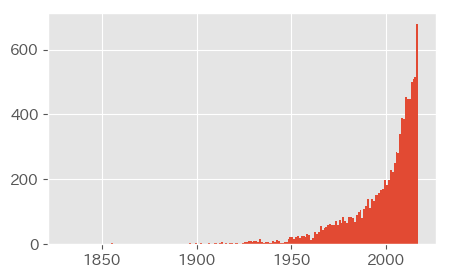

In [17]:
model_df['year'].hist(bins=year_max - year_min)

In [18]:
bins = int(round(year_max - year_min) / 10)
bins

18

In [19]:
temp_df = pd.DataFrame(index=model_df.index)
temp_df['yearBinned'] = pd.cut(model_df['year'].tolist(), bins, precision=0)

In [20]:
X_yrs = pd.get_dummies(temp_df['yearBinned'])
X_yrs.columns.categories

IntervalIndex([(1831.0, 1841.0], (1841.0, 1852.0], (1852.0, 1862.0], (1862.0, 1872.0], (1872.0, 1883.0] ... (1965.0, 1976.0], (1976.0, 1986.0], (1986.0, 1996.0], (1996.0, 2007.0], (2007.0, 2017.0]],
              closed='right',
              dtype='interval[float64]')

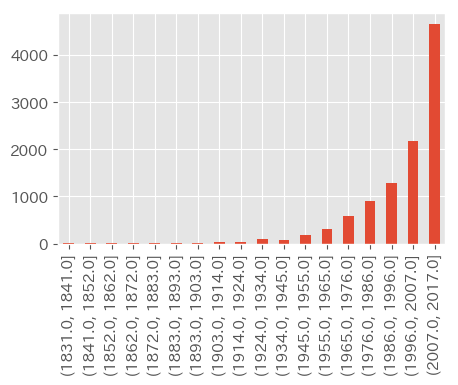

In [21]:
X_yrs.sum().plot(kind='bar')

In [22]:
X_fos = fos_features.values

print('Our pandas Series, in bytes: ', getsizeof(fos_features))
print('Our hashed numpy array, in bytes: ', getsizeof(X_fos))

Our pandas Series, in bytes:  3772086600
Our hashed numpy array, in bytes:  112


In [23]:
X_fos.shape

(10399, 45337)

In [24]:
X_fos.nbytes

3771675704

In [43]:
second_features = np.append(X_fos, X_yrs, axis = 1)

print('The power of feature engineering saves us, in bytes: ',
         getsizeof(first_features) - getsizeof(second_features))

from sklearn.metrics.pairwise import cosine_similarity

def piped_collab_filter(features_matrix, index, top_n):
    item_similarities = \
        1 - cosine_similarity(features_matrix[index:index+1],
                              features_matrix).flatten()
    related_indices = \
        [i for i in item_similarities.argsort()[::-1] if i != index]
    return [(index, item_similarities[index]) for index in related_indices][0:top_n]

The power of feature engineering saves us, in bytes:  -3773173256


In [36]:
first_features.memory_usage().sum()/1000/1000

3785.0176

In [37]:
second_features.nbytes/1000/1000

3773.1731600000003

In [35]:
print('The power of feature engineering saves us, in bytes: ',
         first_features.memory_usage().sum() - second_features.nbytes)


The power of feature engineering saves us, in bytes:  11844440


In [44]:
filled_df = model_df.fillna('None')

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
X_abstract = vectorizer.fit_transform(filled_df['abstract'])

third_features = np.append(second_features, X_abstract.toarray(), axis = 1)

In [45]:
authors_list = []

for row in filled_df.itertuples():
    # それぞれのSeriesインデックスからdict型オブジェクトを作成する
    if isinstance(row.authors, str):
        y = {'None': row.Index}
    if isinstance(row.authors, list):
        # これらのキー、値をdict型オブジェクトに追加する
        y = dict.fromkeys(row.authors[0].values(), row.Index)
    authors_list.append(y)

authors_list[0:5]

[{'None': 0},
 {'Ahmed M. Alluwaimi': 1},
 {'Jovana P. Lekovich': 2, 'Weill Cornell Medical College, New York, NY': 2},
 {'George C. Sponsler': 5},
 {'M. T. Richards': 7}]

In [46]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = authors_list
X_authors = v.fit_transform(D)
fourth_features = np.append(third_features, X_authors, axis=1)

In [47]:
len(D)

10399

In [48]:
X_authors.shape

(10399, 14028)

In [49]:
del second_features
del third_features
del X_fos

In [ ]:
def paper_recommender(items_df, paper_ix, top_n):
    if paper_ix in model_df.index:
        print('Based on the paper:')
        print('Paper index = ', model_df.loc[paper_ix].name)
        print('Title :', model_df.loc[paper_ix]['title'])
        print('FOS :', model_df.loc[paper_ix]['fos'])
        print('Year :', model_df.loc[paper_ix]['year'])
        print('Abstract :', model_df.loc[paper_ix]['abstract'])
        print('Authors :', model_df.loc[paper_ix]['authors'], '\n')

        array_ix = model_df.index.get_loc(paper_ix)
        top_results = piped_collab_filter(items_df, array_ix, top_n)
        print('\nTop',top_n,'results: ')

        order = 1
        for i in range(len(top_results)):
            print(order,'. Paper index = ', model_df.iloc[top_results[i][0]].name)
            print('Similarity score: ', top_results[i][1])
            print('Title :', model_df.iloc[top_results[i][0]]['title'])
            print('FOS :', model_df.iloc[top_results[i][0]]['fos'])
            print('Year :', model_df.iloc[top_results[i][0]]['year'])
            print('Abstract :', model_df.iloc[top_results[i][0]]['abstract'])
            print('Authors :', model_df.iloc[top_results[i][0]]['authors'], '\n')
            if order < top_n: order += 1
                    
    else:
        print('Whoops! Choose another paper. Try something from here: \n', model_df.index[100:200])

paper_recommender(fourth_features, 2, 3)

Based on the paper:
Paper index =  2
Title : Should endometriosis be an indication for intracytoplasmic sperm injection (ICSI) in fresh IVF cycles
FOS : nan
Year : 2015
Abstract : nan
Authors : [{'name': 'Jovana P. Lekovich', 'org': 'Weill Cornell Medical College, New York, NY'}, {'name': 'G.D. Palermo', 'org': 'Weill Medical College of Cornell University, New York, NY'}, {'name': 'Nigel Pereira', 'org': 'The Ronald O. Perelman and Claudia Cohen Center, New York, NY'}, {'name': 'Zev Rosenwaks', 'org': 'Weill Cornell Medical College, New York, NY'}] 

